In [2]:
#dependencies
!pip install scvi-tools
!pip install scikit-misc
!pip install scanpy
!pip install leidenalg

  Using cached scvi_tools-1.0.4-py3-none-any.whl (351 kB)
  Using cached mudata-0.2.3-py3-none-any.whl (24 kB)
  Using cached flax-0.7.4-py3-none-any.whl (233 kB)
  Using cached numpyro-0.13.2-py3-none-any.whl (312 kB)
  Using cached ml_collections-0.1.1.tar.gz (77 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 MB 28.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached optax-0.1.7-py3-none-any.whl (154 kB)
  Using cached lightning-2.0.9.post0-py3-none-any.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.1 MB/s eta 0:00:000m eta 0:00:01
  Using cached torchmetrics-1.2.0-py3-none-any.whl (805 kB)
  Using cached chex-0.1.7-py3-none-any.whl (89 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 26.0 MB/s eta 0:00:00
  Using cached rich-13.6.0-py3-none-any.whl (239 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.4 MB/s eta 0:00:000m eta 0:00:01
  Using cached docrep-0.3.2.tar.gz (33 kB

In [3]:
import scvi
import scanpy as sc
import numpy as np
import pandas as pd
from cellbender.remove_background.downstream import anndata_from_h5

/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/pkg_resources/__init__.py:123: PkgResourcesDeprecationWarning: 4.0.0-unsupported is an invalid version and will not be supported in a future release
  warnings.warn(
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [102]:
#Load data
#adata_pl=sc.read_10x_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/output_filtered.h5")
#adata_pl=anndata_from_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/output.h5")
#adata_pl=sc.read_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_run2.h5ad")
adata_pl=sc.read_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_soupdoublets&mito_filtered_animal_labelled.h5ad")

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [15]:
adata_pl.var_names

Index(['POL3', 'gene26597', 'gene26598', 'SPX2', 'gene26599', 'gene26600',
       'gene26601', 'gene26602', 'PKNOX2', 'POL',
       ...
       'gene65588', 'gene65589', 'gene65590', 'gene65591', 'gene65592', 'NU5M',
       'COX1', 'COX1', 'NU2M', 'gene65597'],
      dtype='object', length=65597)

In [16]:
adata_pl.var_names_make_unique()
sc.pp.filter_cells(adata_pl, min_genes=200)
sc.pp.filter_genes(adata_pl, min_cells=3)
sc.pp.highly_variable_genes(adata_pl, n_top_genes=10000,subset=True,flavor='seurat_v3')
# Patterns for gene names to remove
patterns_to_remove = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' (OR) operator
gene_pattern = '|'.join(patterns_to_remove)

# Use the regex pattern to filter and remove genes
adata_pl = adata_pl[:, ~adata_pl.var_names.str.contains(gene_pattern, regex=True)]

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [18]:
adata_pl=adata_pl.copy()

In [19]:
#Train the doublet finder
scvi.model.SCVI.setup_anndata(adata_pl)
vae=scvi.model.SCVI(adata_pl)
vae.train()

/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(


Epoch 400/400: 100%|██████████| 400/400 [28:04<00:00,  4.30s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.29e+3]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [28:04<00:00,  4.21s/it, v_num=1, train_loss_step=1.33e+3, train_loss_epoch=1.29e+3]


In [20]:
#Model containing doublets

solo=scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/nikvaku/PycharmProjects/samap/lib/python3.9/si ...
  rank_zero_warn(
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/nikvaku/PycharmProjects/samap/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used

Epoch 264/400:  66%|██████▌   | 264/400 [03:55<02:01,  1.12it/s, v_num=1, train_loss_step=0.402, train_loss_epoch=0.329]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.312. Signaling Trainer to stop.


In [21]:
df=solo.predict()
df['prediction']=solo.predict(soft=False)
df

,doublet,singlet,prediction
CACTAAGTCGGCATAT-1,0.697254,-1.385953,doublet
CAGCAATGTCCTACGG-1,2.496740,-3.007022,doublet
AGAGAGCTCGACCCAG-1,0.828879,-1.491934,doublet
GTTGTAGGTGTTGAGG-1,1.134844,-2.033197,doublet
TGTGATGAGAATTGTG-1,2.097515,-2.741457,doublet
...,...,...,...
TCGCTCATCTGCGGCA-1,-3.773989,3.394715,singlet
AACGAAATCGATGCTA-1,-4.599492,4.162615,singlet
TGTGATGTCGCGTCGA-1,-2.836143,2.846871,singlet
CTTCCGAAGGTACTGG-1,-2.472804,2.019033,singlet


In [24]:
doublets=df[df['prediction']=='doublet']

In [25]:
doublets

,doublet,singlet,prediction
CACTAAGTCGGCATAT-1,0.697254,-1.385953,doublet
CAGCAATGTCCTACGG-1,2.496740,-3.007022,doublet
AGAGAGCTCGACCCAG-1,0.828879,-1.491934,doublet
GTTGTAGGTGTTGAGG-1,1.134844,-2.033197,doublet
TGTGATGAGAATTGTG-1,2.097515,-2.741457,doublet
...,...,...,...
TGAATCGGTACCTAAC-1,-0.107940,-0.476064,doublet
GTTGCGGTCTAAGCGT-1,0.089142,-0.654361,doublet
TGAATGCTCTACCCAC-1,0.236779,-0.636908,doublet
CAGCCAGCACGAAGAC-1,0.140212,-0.297944,doublet


In [17]:
#adata_pl_seu=sc.read_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Pw_spleenR1.h5ad")

In [18]:
#adata_pl_seu

AnnData object with n_obs × n_vars = 19045 × 65597
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'soup_assign', 'soup_status', 'scds_DropletType', 'combined_status', 'percent.mito', 'RNA_snn_res.0.8', 'seurat_clusters', 'ident'
    uns: 'X_name'
    obsm: 'PCA', 'UMAP'
    layers: 'logcounts'

In [31]:

#seurat_clusters=dict(zip(adata_pl_seu.obs_names,adata_pl_seu.obs['seurat_clusters']))

In [33]:
#seurat_clusters

{'AAACCCAAGACGCTCC-1': '1',
 'AAACCCAAGATCCTAC-1': '16',
 'AAACCCAAGCCGCACT-1': '0',
 'AAACCCAAGCTTTCTT-1': '0',
 'AAACCCAAGGCATCTT-1': '0',
 'AAACCCAAGTCACTGT-1': '0',
 'AAACCCACAACCCGCA-1': '0',
 'AAACCCACAAGTCCAT-1': '0',
 'AAACCCACAGCTGAAG-1': '6',
 'AAACCCACATACTGTG-1': '5',
 'AAACCCACATTGGCAT-1': '3',
 'AAACCCAGTACCAATC-1': '4',
 'AAACCCAGTATGAAAC-1': '4',
 'AAACCCAGTATTGAGA-1': '0',
 'AAACCCAGTCTTTCAT-1': '2',
 'AAACCCAGTGTACATC-1': '1',
 'AAACCCAGTTACACTG-1': '0',
 'AAACCCATCGCTATTT-1': '6',
 'AAACCCATCGGACCAC-1': '1',
 'AAACCCATCGTAACCA-1': '0',
 'AAACGAAAGAAACTAC-1': '9',
 'AAACGAAAGCAACCAG-1': '1',
 'AAACGAAAGGAGAATG-1': '0',
 'AAACGAAAGGTCCAGA-1': '0',
 'AAACGAAAGTATGTAG-1': '4',
 'AAACGAAAGTCTAACC-1': '12',
 'AAACGAAAGTCTACCA-1': '17',
 'AAACGAACAGGATTCT-1': '12',
 'AAACGAACATCGGAGA-1': '6',
 'AAACGAAGTCACTGAT-1': '2',
 'AAACGAAGTCGATTCA-1': '3',
 'AAACGAAGTGGGAGAG-1': '15',
 'AAACGAAGTGGTAACG-1': '1',
 'AAACGAAGTTCCGCAG-1': '16',
 'AAACGAAGTTTCCATT-1': '0',
 'AAACGAATCACA

In [39]:
#adata_pl.obs['seurat_clusters']=adata_pl.obs_names.map(seurat_clusters)

In [10]:
adata_pl.obs_names

Index(['TTAGTCTTCTTCGGAA-1', 'TCTCACGTCTCCTGAC-1', 'TATTCCACAGCTTCGG-1',
       'CGATGGCAGAGCTGCA-1', 'CGTGAATGTCAGTTTG-1', 'AAGACTCGTATGAGGC-1',
       'CTCCGATAGCAGGGAG-1', 'GTGCAGCAGACTTCAC-1', 'ACTGCAAGTAGAGATT-1',
       'CACCAAAAGCATTTGC-1',
       ...
       'TATCTGTCATCGGAAG-1', 'TCTTAGTCACAGACGA-1', 'GGGACCTGTCATCACA-1',
       'TACGGGCAGTGAGTTA-1', 'GCCCAGATCGGAACTT-1', 'TCGCTCATCTGCGGCA-1',
       'AACGAAATCGATGCTA-1', 'TGTGATGTCGCGTCGA-1', 'CTTCCGAAGGTACTGG-1',
       'ATACTTCGTTGTCTAG-1'],
      dtype='object', name='barcode', length=12501)

In [83]:
doublets.index

Index(['CACTAAGTCGGCATAT-1', 'CAGCAATGTCCTACGG-1', 'AGAGAGCTCGACCCAG-1',
       'GTTGTAGGTGTTGAGG-1', 'TGTGATGAGAATTGTG-1', 'TCGTCCACATGTGTCA-1',
       'TCCTTCTCATTAGGCT-1', 'CGTTAGATCTATGTGG-1', 'TTGCATTTCCGAGATT-1',
       'AGTTCGACAGCGGTCT-1',
       ...
       'ACTTTGTAGTGTCATC-1', 'AACCTTTTCATCTACT-1', 'TCTATACCATACTGAC-1',
       'CCCAACTCACGGTGAA-1', 'GATAGAAGTAACAAGT-1', 'TGAATCGGTACCTAAC-1',
       'GTTGCGGTCTAAGCGT-1', 'TGAATGCTCTACCCAC-1', 'CAGCCAGCACGAAGAC-1',
       'CTAACTTTCACTGTCC-1'],
      dtype='object', length=4871)

In [84]:
mapper=dict(zip(doublets.index,doublets['prediction']))

In [85]:
len(mapper)

4871

In [86]:
len(adata_pl.obs.index)

18790

In [99]:
adata_pl.obs

,background_fraction,cell_probability,cell_size,droplet_efficiency,soup_assign
barcode,,,,,
CACTAAGTCGGCATAT-1,0.009054,0.999955,66069.031250,2.499887,doublet
CAGCAATGTCCTACGG-1,0.008527,0.999955,65626.125000,2.499716,singlet
AGAGAGCTCGACCCAG-1,0.012405,0.999955,50770.105469,2.499759,singlet
GTTGTAGGTGTTGAGG-1,0.014929,0.999955,72146.414062,1.624732,singlet
TGTGATGAGAATTGTG-1,0.012294,0.999955,45050.957031,2.499399,singlet
...,...,...,...,...,...
CGGTCAGTCCTCACTG-1,1.000000,0.055549,7482.158691,0.649382,singlet
GTTACAGCAGTCTCTC-1,1.000000,0.071309,7565.931641,0.637274,singlet
TCTAACTCACAGGATG-1,1.000000,0.065818,7347.096680,0.669656,singlet


In [93]:
adata_pl.obs['soup_assign'].value_counts()

soup_assign
singlet       13710
doublet        3766
unassigned      324
Name: count, dtype: int64

In [103]:
for cell_identifier in adata_pl.obs.index:
    if cell_identifier in mapper:
        adata_pl.obs.at[cell_identifier, 'soup_assign'] = mapper[cell_identifier]

KeyError: 'CACTAAGTCGGCATAT-1'

In [95]:
adata_pl.obs

,background_fraction,cell_probability,cell_size,droplet_efficiency,soup_assign
barcode,,,,,
CACTAAGTCGGCATAT-1,0.009054,0.999955,66069.031250,2.499887,doublet
CAGCAATGTCCTACGG-1,0.008527,0.999955,65626.125000,2.499716,doublet
AGAGAGCTCGACCCAG-1,0.012405,0.999955,50770.105469,2.499759,doublet
GTTGTAGGTGTTGAGG-1,0.014929,0.999955,72146.414062,1.624732,doublet
TGTGATGAGAATTGTG-1,0.012294,0.999955,45050.957031,2.499399,doublet
...,...,...,...,...,...
CGGTCAGTCCTCACTG-1,1.000000,0.055549,7482.158691,0.649382,singlet
GTTACAGCAGTCTCTC-1,1.000000,0.071309,7565.931641,0.637274,singlet
TCTAACTCACAGGATG-1,1.000000,0.065818,7347.096680,0.669656,singlet


In [104]:
adata_pl.obs['soup_assign'].value_counts()

soup_assign
singlet       10363
doublet        7178
unassigned      263
Name: count, dtype: int64

In [105]:
adata_pl.obs['Animal'].value_counts()

Animal
2    4232
0    4156
1    4108
Name: count, dtype: int64

In [106]:
#Save the dataset
adata_pl.write_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_doublets_filtered_animal_labelled.h5ad")

In [14]:
#Subset the data
adata_pl_sing=adata_pl[adata_pl.obs['prediction']=='singlet']

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [15]:
#Preprocess the data
sc.pp.normalize_total(adata_pl_sing, target_sum=1e4)
sc.pp.log1p(adata_pl_sing)
sc.pp.scale(adata_pl_sing, max_value=10)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


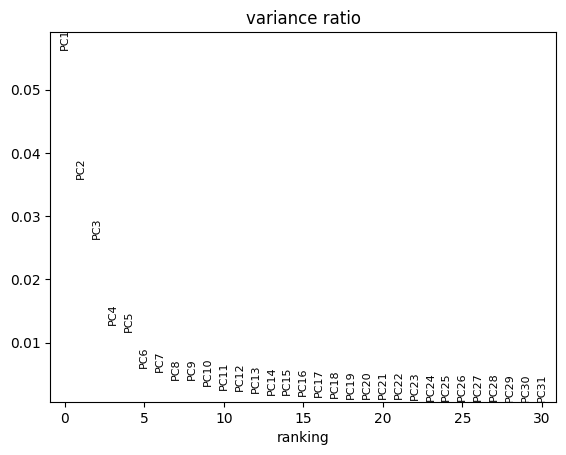

In [16]:
#Run PCA
sc.tl.pca(adata_pl_sing, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_pl_sing)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


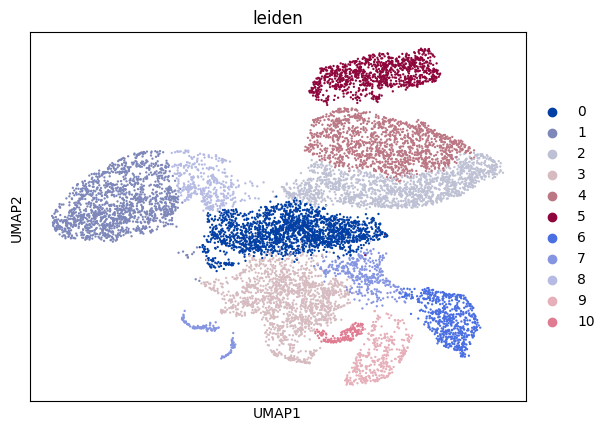

In [33]:
#UMAP
sc.pp.neighbors(adata_pl_sing, n_neighbors=10, n_pcs=10)
sc.tl.umap(adata_pl_sing)
sc.tl.leiden(adata_pl_sing, resolution=0.2)
sc.pl.umap(adata_pl_sing, color=['leiden'])

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


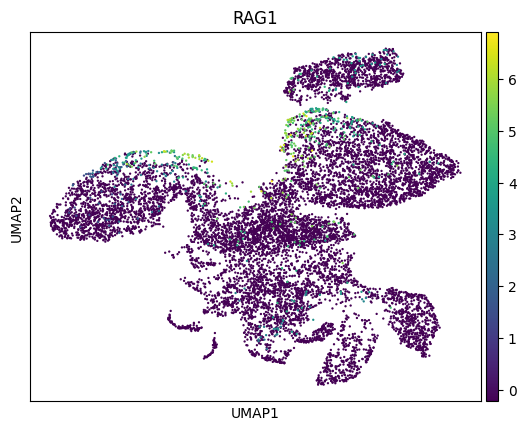

In [34]:
sc.pl.umap(adata_pl_sing,color="RAG1")

In [35]:
#Preprocessing adata_pl
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)
sc.pp.scale(adata_pl, max_value=10)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


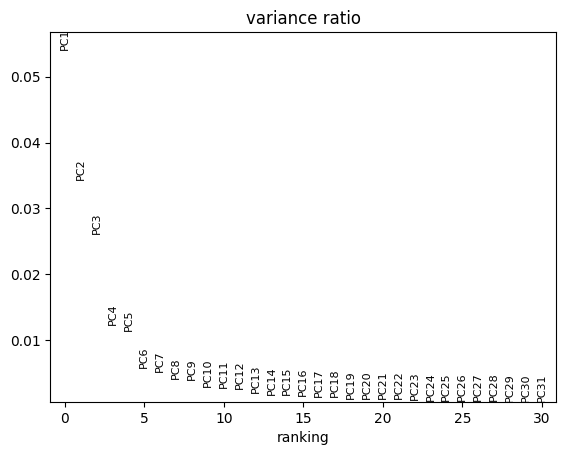

In [36]:
#Run PCA
sc.tl.pca(adata_pl, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_pl)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


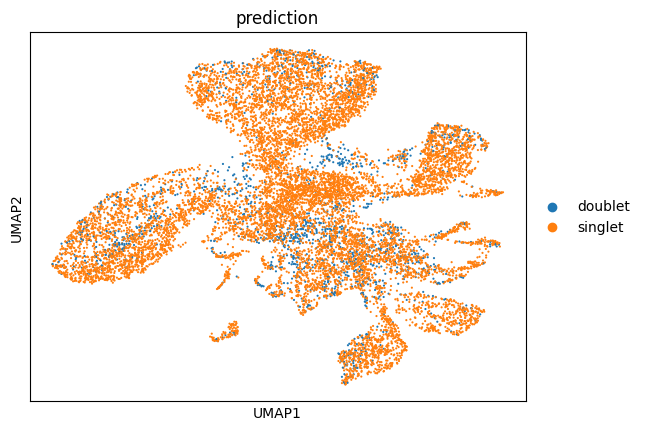

In [38]:
#UMAP
sc.pp.neighbors(adata_pl, n_neighbors=15, n_pcs=15)
sc.tl.umap(adata_pl)
sc.pl.umap(adata_pl, color=['prediction'])

In [131]:
#Import souporcell data
spleen_souporcell=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230704_spleen_R1_soup/20230603_24h_soup_res/clusters.tsv")
#Map the barcode to the index of adata_pl
spleen_souporcell_sub = spleen_souporcell[spleen_souporcell['barcode'].isin(adata_pl.obs_names)]

In [132]:
spleen_souporcell_sub

,barcode,status,assignment,singlet_posterior,doublet_posterior,log_prob_singleton,log_prob_doublet,cluster0,cluster1,cluster2
0,AAACCCAAGACGCTCC-1,singlet,0,1.0,0.000000e+00,-301.963147,-376.527277,-301.963147,-583.471541,-693.971984
12,AAACCCACACTATGTG-1,doublet,0/2,1.0,1.000000e+00,-253.170530,-224.000558,-253.170530,-271.370701,-275.800351
15,AAACCCACAGCTGAAG-1,singlet,1,1.0,1.096845e-08,-218.815493,-237.143736,-313.403067,-218.815493,-349.636835
19,AAACCCACATACTGTG-1,singlet,0,1.0,1.284917e-05,-184.895432,-196.157651,-184.895432,-273.352635,-274.642750
20,AAACCCACATTGGCAT-1,singlet,0,1.0,0.000000e+00,-288.539620,-356.285944,-288.539620,-536.113700,-616.518726
...,...,...,...,...,...,...,...,...,...,...
33556,TTTGTTGGTGCAAGAC-1,singlet,2,1.0,0.000000e+00,-254.078396,-334.909530,-532.817929,-579.763219,-254.078396
33558,TTTGTTGGTGTCCGTG-1,singlet,2,1.0,0.000000e+00,-313.834760,-399.572507,-597.277883,-645.472420,-313.834760
33559,TTTGTTGGTGTCTTGA-1,singlet,2,1.0,0.000000e+00,-363.313603,-433.656897,-642.248907,-693.255481,-363.313603
33562,TTTGTTGTCAAACTGC-1,singlet,2,1.0,0.000000e+00,-333.518005,-428.240052,-639.646012,-741.414163,-333.518005


In [134]:
spleen_souporcell_doublet=spleen_souporcell_sub[spleen_souporcell_sub['status']=='doublet']

In [135]:
spleen_souporcell_doublet

,barcode,status,assignment,singlet_posterior,doublet_posterior,log_prob_singleton,log_prob_doublet,cluster0,cluster1,cluster2
12,AAACCCACACTATGTG-1,doublet,0/2,1.0,1.0,-253.170530,-224.000558,-253.170530,-271.370701,-275.800351
22,AAACCCAGTAGCTGAG-1,doublet,0/2,1.0,1.0,-276.685174,-251.076051,-276.685174,-307.205724,-301.390427
43,AAACCCATCTTGTGCC-1,doublet,0/2,1.0,1.0,-370.811383,-330.820704,-370.811383,-400.793888,-392.184837
53,AAACGAACACACACTA-1,doublet,0/2,1.0,1.0,-245.541121,-224.211381,-245.541121,-291.928989,-256.503603
59,AAACGAACATGTGTCA-1,doublet,0/1,1.0,1.0,-214.198083,-196.149440,-214.198083,-232.269637,-238.263378
...,...,...,...,...,...,...,...,...,...,...
33503,TTTGGTTGTACTGTTG-1,doublet,2/0,1.0,1.0,-581.106358,-475.804093,-588.891948,-613.366993,-581.106358
33511,TTTGGTTGTTCCCACT-1,doublet,0/1,1.0,1.0,-212.240225,-193.742550,-212.240225,-217.794354,-258.515314
33532,TTTGTTGCAACGATCT-1,doublet,0/1,1.0,1.0,-298.050982,-281.188637,-298.050982,-327.330697,-377.341041
33544,TTTGTTGGTACACGCC-1,doublet,2/0,1.0,1.0,-522.806501,-443.055367,-524.232049,-640.517636,-522.806501


In [141]:
adata_pl_dob = adata_pl[(adata_pl.obs['prediction'] == 'doublet') ]

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [142]:
cellid_scvi=adata_pl_dob.obs.index

In [143]:
cellid_soup=spleen_souporcell_doublet['barcode']

In [144]:
list(cellid_scvi)

['TTAGTCTTCTTCGGAA-1',
 'TCTCACGTCTCCTGAC-1',
 'TATTCCACAGCTTCGG-1',
 'CGATGGCAGAGCTGCA-1',
 'CTCCGATAGCAGGGAG-1',
 'CACTAAGAGGGCAGAG-1',
 'GTGTCCTGTTCCGCAG-1',
 'TTTGATCAGGCGTTAG-1',
 'CCTGTTGGTATCGCAT-1',
 'CCCTAACGTTGCATTG-1',
 'TGATCTTCAAGTGCTT-1',
 'CTGCGAGAGAGATCGC-1',
 'AGGTTACTCCATCTCG-1',
 'AGCTTCCGTGCAGTGA-1',
 'TCGGATAAGACGGTTG-1',
 'TTGGGCGCACGCCAGT-1',
 'GTACAACCACAGCTTA-1',
 'TTCATGTGTATCCTCC-1',
 'GTGTCCTCAAGACAAT-1',
 'AACGAAAGTTCGTACA-1',
 'CAGTTAGAGTGTACCT-1',
 'TCAAGACTCGGTTGTA-1',
 'TACTTGTGTCGGATTT-1',
 'TTACCGCTCGGCATAT-1',
 'GTCCACTAGAGGCGGA-1',
 'GAGGCCTAGCCTTTCC-1',
 'AATGGCTTCCAGCAAT-1',
 'TCCATGCGTCGTTGGC-1',
 'CGAATTGCAGGAATCG-1',
 'GAAGAATGTGTGTGTT-1',
 'TCATGAGTCATTCGTT-1',
 'TTCAATCGTGTTTACG-1',
 'ACCCTCATCCCAGTGG-1',
 'CAGTTCCTCATGAGTC-1',
 'CATTGCCAGTAGCTCT-1',
 'TTTGGTTTCCCTATTA-1',
 'TTCCAATTCGAACCTA-1',
 'GGCAGTCAGCAACCAG-1',
 'CGAAGGAAGGCCGCTT-1',
 'CGATGCGAGTTTCAGC-1',
 'GCAGGCTTCGCTGATA-1',
 'AGACTCAGTGCCTGCA-1',
 'CTCAAGACAACCCGCA-1',
 'CCGCAAGGT

In [145]:
list(cellid_soup)

['AAACCCACACTATGTG-1',
 'AAACCCAGTAGCTGAG-1',
 'AAACCCATCTTGTGCC-1',
 'AAACGAACACACACTA-1',
 'AAACGAACATGTGTCA-1',
 'AAACGAATCATTCTTG-1',
 'AAACGCTAGGTAGACC-1',
 'AAAGAACTCCATCCGT-1',
 'AAAGGATCACAATGCT-1',
 'AAAGGTAGTTAACCTG-1',
 'AAAGGTAGTTCGGCGT-1',
 'AAAGTCCCAGTTGGTT-1',
 'AAAGTCCGTACCATAC-1',
 'AAAGTGATCACATCAG-1',
 'AAAGTGATCCTAGCTC-1',
 'AAATGGAAGGAATTAC-1',
 'AAATGGACACTACCCT-1',
 'AACAAAGAGGTGCCTC-1',
 'AACAAAGCAAATGGAT-1',
 'AACAAAGGTATACCTG-1',
 'AACAACCCAAATGGCG-1',
 'AACAACCCAGTCGCAC-1',
 'AACAACCGTCTTCCGT-1',
 'AACAACCTCGAAGCCC-1',
 'AACAACCTCGCGCTGA-1',
 'AACAACCTCTACTGCC-1',
 'AACAACCTCTCCAATT-1',
 'AACAACCTCTCTGGTC-1',
 'AACAAGAAGGTGATCG-1',
 'AACAAGATCTCGCTTG-1',
 'AACACACCAGCAAGAC-1',
 'AACACACGTATTCTCT-1',
 'AACACACGTTAGCTAC-1',
 'AACACACTCTTAGCTT-1',
 'AACAGGGAGTCCGCGT-1',
 'AACAGGGTCCTCTAGC-1',
 'AACAGGGTCGCTGATA-1',
 'AACCAACAGCAGGGAG-1',
 'AACCAACAGGTGGCTA-1',
 'AACCAACCAAACTAGA-1',
 'AACCACAAGGCCCGTT-1',
 'AACCACACAAAGGGCT-1',
 'AACCACATCAGTCTTT-1',
 'AACCATGAG

In [77]:
#Common cells in soup and adata_pl

1733

In [147]:
spleen_souporcell_sub['status'].value_counts()

status
singlet       9291
doublet       2443
unassigned     235
Name: count, dtype: int64

In [148]:
common_elements = set(cellid_scvi).intersection(cellid_soup)
common_elements

{'AAAGAACTCCATCCGT-1',
 'AAAGTCCGTACCATAC-1',
 'AACAAAGCAAATGGAT-1',
 'AACAACCGTCTTCCGT-1',
 'AACAAGAAGGTGATCG-1',
 'AACACACCAGCAAGAC-1',
 'AACCAACAGCAGGGAG-1',
 'AACCATGTCTGCGGAC-1',
 'AACCTGACATTCGATG-1',
 'AACCTTTGTTGTGTAC-1',
 'AAGAACACAGTAGATA-1',
 'AAGACAAAGTTCACTG-1',
 'AAGCATCAGCGAACTG-1',
 'AAGTACCGTACTGCGC-1',
 'AAGTGAAAGTCGGGAT-1',
 'AAGTGAACACTGGCCA-1',
 'AATAGAGAGTCATCCA-1',
 'AATCGACGTATTGAGA-1',
 'AATCGACTCGCTCATC-1',
 'AATGACCTCCTACACC-1',
 'AATTTCCAGTGAATAC-1',
 'AATTTCCCATGGACAG-1',
 'ACAAAGATCGTTTACT-1',
 'ACAACCAGTTACCTGA-1',
 'ACAACCATCTCGTTTA-1',
 'ACACGCGCAACGATCT-1',
 'ACACGCGGTATCCCAA-1',
 'ACACTGACAACTACGT-1',
 'ACAGCCGCAGTGTGGA-1',
 'ACAGGGACATCGTTCC-1',
 'ACATCGACAGGATTCT-1',
 'ACATTTCGTACCAGAG-1',
 'ACATTTCTCTCCCTAG-1',
 'ACCAACACAGTAACCT-1',
 'ACCATTTAGCTCACTA-1',
 'ACCATTTTCCGTACGG-1',
 'ACCCAAAAGCTCCATA-1',
 'ACCCTCAAGACCGCCT-1',
 'ACGATCAAGTCTGCAT-1',
 'ACGATGTCAGAGATGC-1',
 'ACGCACGCAATTGCAC-1',
 'ACGTACAAGCGAAACC-1',
 'ACGTTCCGTAGCGTCC-1',
 'ACTATCTCA

In [149]:
len(common_elements)

544

In [150]:
cellid_scvi = set(cellid_scvi)
cellid_soup = set(cellid_soup)

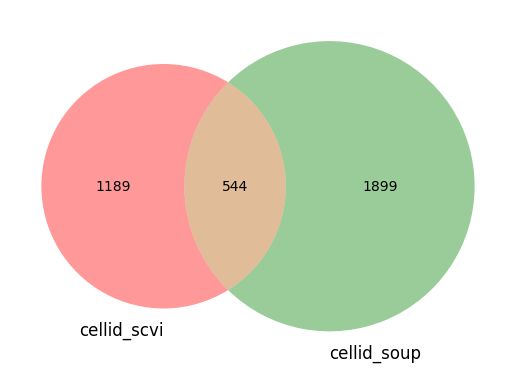

In [151]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
venn2([cellid_scvi, cellid_soup], ('cellid_scvi', 'cellid_soup'))

In [91]:
#ADD both the doublet objects to create a new one
doublets= cellid_scvi.union(cellid_soup)
doublets=list(doublets)

In [120]:
adata_pl.obs['prediction']='singlet'

/tmp/ipykernel_3898533/2589479006.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_pl.obs['prediction']='singlet'


In [121]:
doublets_in_adata_pl = list(set(doublets).intersection(adata_pl.obs_names))
adata_pl.obs.loc[doublets_in_adata_pl, 'prediction'] = 'doublet'

In [122]:
adata_pl.obs['prediction'].value_counts()

prediction
singlet    8869
doublet    3632
Name: count, dtype: int64

In [123]:
#Preprocess the data
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)
sc.pp.scale(adata_pl, max_value=10)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


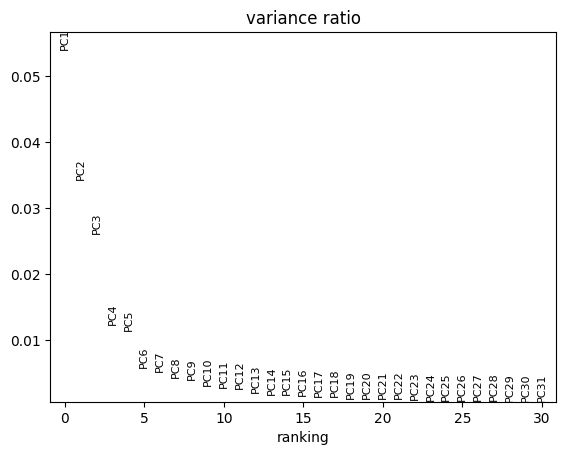

In [124]:
#Run PCA
sc.tl.pca(adata_pl, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_pl)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


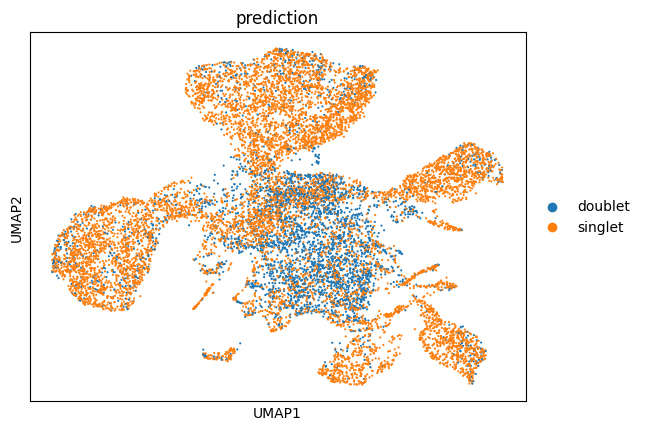

In [125]:
#UMAP
sc.pp.neighbors(adata_pl, n_neighbors=15, n_pcs=15)
sc.tl.umap(adata_pl)
sc.tl.leiden(adata_pl, resolution=1)
sc.pl.umap(adata_pl, color=['prediction'])

In [113]:
#Create a dictionary with cell_id and assignment
cellid_assignment=dict(zip(spleen_souporcell['barcode'],spleen_souporcell['assignment']))

In [114]:
cellid_assignment

{'AAACCCAAGACGCTCC-1': '0',
 'AAACCCAAGATCCTAC-1': '1',
 'AAACCCAAGCCGCACT-1': '0',
 'AAACCCAAGCCTCAAT-1': '0/2',
 'AAACCCAAGCTTTCTT-1': '0',
 'AAACCCAAGGATATAC-1': '0/1',
 'AAACCCAAGGCATCTT-1': '0',
 'AAACCCAAGTCACTGT-1': '0',
 'AAACCCACAACCCGCA-1': '0',
 'AAACCCACAACTGCTA-1': '1/0',
 'AAACCCACAAGTCCAT-1': '0',
 'AAACCCACACCGAATT-1': '0/1',
 'AAACCCACACTATGTG-1': '0/2',
 'AAACCCACAGATACTC-1': '0/1',
 'AAACCCACAGCGACCT-1': '0/1',
 'AAACCCACAGCTGAAG-1': '1',
 'AAACCCACAGCTGTAT-1': '2/1',
 'AAACCCACAGCTTTGA-1': '0/2',
 'AAACCCACAGGGCTTC-1': '0/2',
 'AAACCCACATACTGTG-1': '0',
 'AAACCCACATTGGCAT-1': '0',
 'AAACCCAGTACCAATC-1': '1',
 'AAACCCAGTAGCTGAG-1': '0/2',
 'AAACCCAGTATGAAAC-1': '1',
 'AAACCCAGTATTGAGA-1': '0',
 'AAACCCAGTCAAACGG-1': '2/0',
 'AAACCCAGTCCTGTTC-1': '0',
 'AAACCCAGTCTTTCAT-1': '2',
 'AAACCCAGTGATGAAT-1': '0/2',
 'AAACCCAGTGTACATC-1': '0',
 'AAACCCAGTTACACTG-1': '0',
 'AAACCCATCAAGCCTA-1': '1',
 'AAACCCATCATCAGTG-1': '1/2',
 'AAACCCATCATTCACT-1': '0/1',
 'AAACCCATCCACAGGC

In [153]:
#Create a new column in adata_pl for individual animals
adata_pl.obs['animal'] = None

In [154]:
#Map the cell_id to the animal
adata_pl.obs['animal']=adata_pl.obs_names.map(cellid_assignment)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


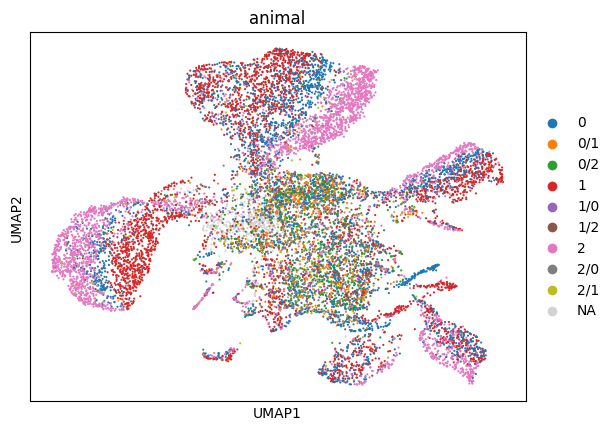

In [128]:
sc.pl.umap(adata_pl, color=['animal'])

/tmp/ipykernel_3898533/2804073063.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['leiden', 'Animal']).size().unstack()


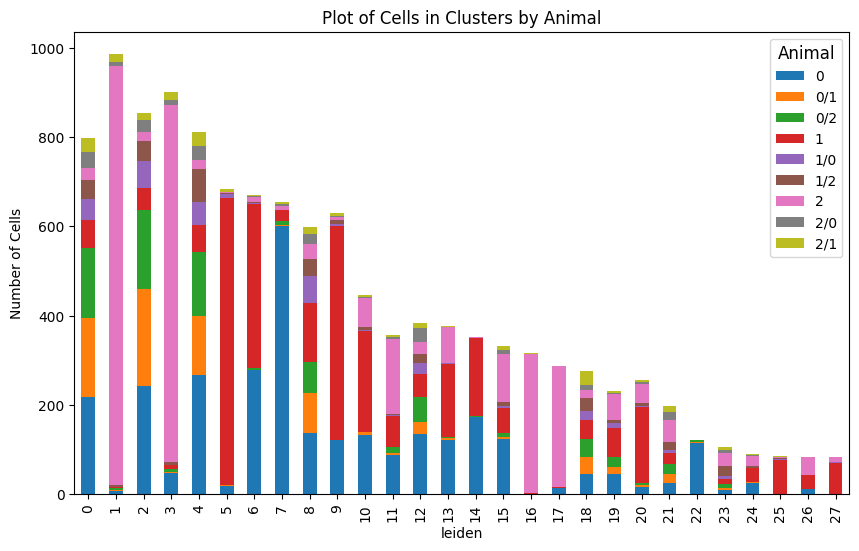

In [156]:
#Plot Stacked bar plot of cells from each animal in a cluster
# Create a DataFrame from the AnnData object
df = pd.DataFrame({'leiden': adata_pl.obs['leiden'], 'Animal': adata_pl.obs['animal']})

# Group and count cells in each cluster for each animal
grouped = df.groupby(['leiden', 'Animal']).size().unstack()

# Plot the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('leiden')
plt.ylabel('Number of Cells')
plt.title('Plot of Cells in Clusters by Animal')

# Show the plot
plt.legend(title='Animal', title_fontsize='12', loc='upper right')
plt.show()

/tmp/ipykernel_3898533/3561587147.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['leiden', 'Type']).size().unstack()


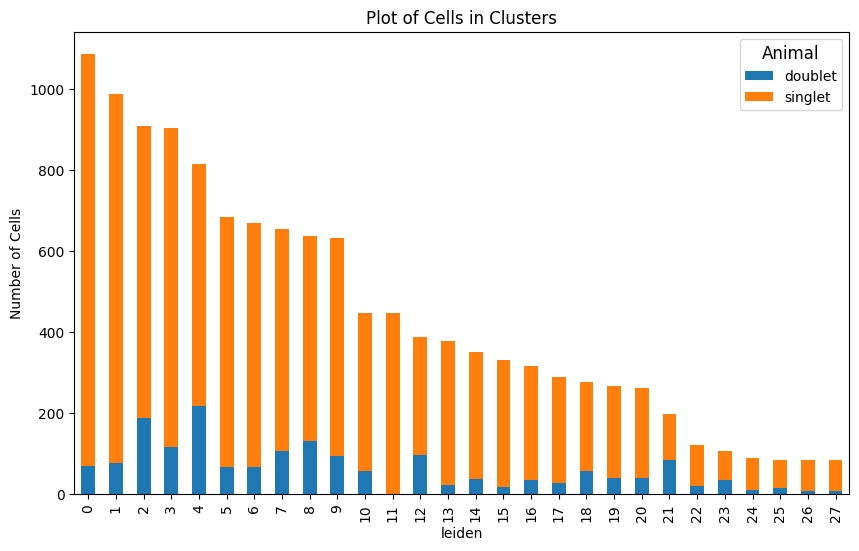

In [157]:
#Plot Stacked bar plot of doublets in a cluster
# Create a DataFrame from the AnnData object
df = pd.DataFrame({'leiden': adata_pl.obs['leiden'], 'Type': adata_pl.obs['prediction']})

# Group and count cells in each cluster for each animal
grouped = df.groupby(['leiden', 'Type']).size().unstack()

# Plot the stacked bar plot
ax = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))

# Set labels and title
plt.xlabel('leiden')
plt.ylabel('Number of Cells')
plt.title('Plot of Cells in Clusters')

# Show the plot
plt.legend(title='Animal', title_fontsize='12', loc='upper right')
plt.show()